Importing necessary Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report
from sklearn import metrics, preprocessing

Loading Dataset

In [2]:
# Load dataset
df = pd.read_csv("cardio_train.csv", sep=";")

In [3]:
#drop id
df = df.drop('id', axis=1)
df['age'] = (df['age'] / 365).round().astype('int')
print(df.head())

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   52       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   48       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0  


In [4]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


Data PreProcessing

1)Remove Outliers

In [5]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)
len(df)

60142

In [6]:
#after removing outliers
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,53.338798,1.347311,164.554854,73.426805,125.770526,81.046307,1.350953,1.220229,0.085631,0.051877,0.803648,0.488228
std,6.746864,0.476120,6.830174,11.614806,13.761847,8.239157,0.670076,0.567607,0.279820,0.221781,0.397241,0.499866
min,30.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,180.000000,106.000000,163.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


2)Categorizing features

In [7]:
# # Define the bin edges and labels
age_edges = [30, 35, 40, 45, 50, 55, 60, 65]
age_labels = [0, 1, 2, 3, 4, 5, 6]

#  bin in  5 years span
df['age_group'] = pd.cut(df['age'], bins=7, labels=range(7), include_lowest=True,right=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3


3)Attribute Combination

In [8]:
df['bmi'] = df['weight']/((df['height']/100)**2)
df.head()

bmiMin = int(df['bmi'].min())
bmiMax = int(df['bmi'].max())

print(bmiMin, bmiMax)

df['bmi'] = pd.cut(df['bmi'], bins=6, labels=range(6), right=True, include_lowest=True)

df.head()

df["bmi"].value_counts(normalize=True)

16 46


bmi
1    0.461325
2    0.330202
3    0.133068
0    0.038193
4    0.033554
5    0.003658
Name: proportion, dtype: float64

In [9]:
df['map'] = ((2* df['ap_lo']) + df['ap_hi']) / 3

mapMin = int(df['map'].min())
mapMax = int(df['map'].max())

print(mapMin, mapMax)

df['map'] = pd.cut(df['map'], bins=6, labels=range(6), right=True, include_lowest=True)

df.head()

73 121


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,1,2
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,3,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,1,2
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,2,5
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3,1,0


4)Missing Values

In [10]:
null_rows = df[df.isnull().any(axis=1)]
print("Rows with null values:")
print(null_rows)

Rows with null values:
Empty DataFrame
Columns: [age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, age_group, bmi, map]
Index: []


In [11]:
# Drop non categorical features
df_og=df
df=df.drop(['height','weight','ap_hi','ap_lo','age'],axis=1)
df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,2,1,1,0,0,1,0,3,1,2
1,1,3,1,0,0,1,1,4,3,4
2,1,3,1,0,0,0,1,4,1,2
3,2,1,1,0,0,1,1,3,2,5
4,1,1,1,0,0,0,0,3,1,0


5)Label Encoding

In [12]:
# Label Encoder
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.describe()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,0.347311,0.350953,0.220229,0.085631,0.051877,0.803648,0.488228,4.042233,1.673440,2.359449
std,0.476120,0.670076,0.567607,0.279820,0.221781,0.397241,0.499866,1.377070,0.898707,1.186906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.000000,3.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,5.000000


6)KModes Clustering

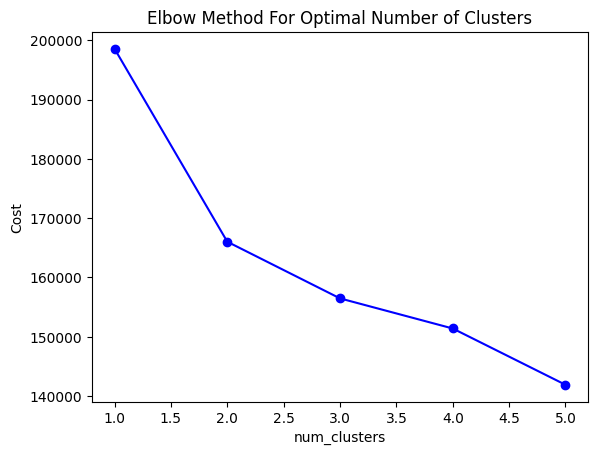

In [13]:
cost = []
num_clusters = range(1,6) # 1 to 5
for i in list(num_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 5, verbose=0,random_state=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

plt.plot(num_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [14]:
km = KModes(n_clusters=2, init = "Huang", n_init = 5,random_state=1)
clusters = km.fit_predict(df)
clusters

array([1, 0, 1, ..., 1, 0, 1], dtype=uint16)

In [15]:
df.insert(0,"clusters",clusters,True)
df.head()

,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,1,1,0,0,0,0,1,0,3,1,2
1,0,0,2,0,0,0,1,1,4,3,4
2,1,0,2,0,0,0,0,1,4,1,2
3,0,1,0,0,0,0,1,1,3,2,5
4,1,0,0,0,0,0,0,0,3,1,0


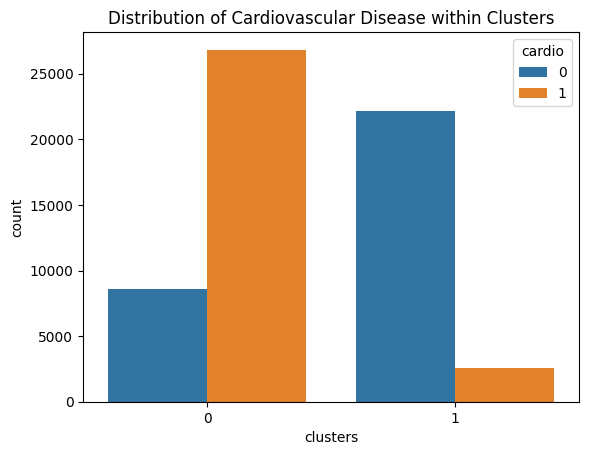

In [16]:
sns.countplot(x='clusters', hue='cardio', data=df)
plt.title('Distribution of Cardiovascular Disease within Clusters')
plt.show()

Correlation Matrix

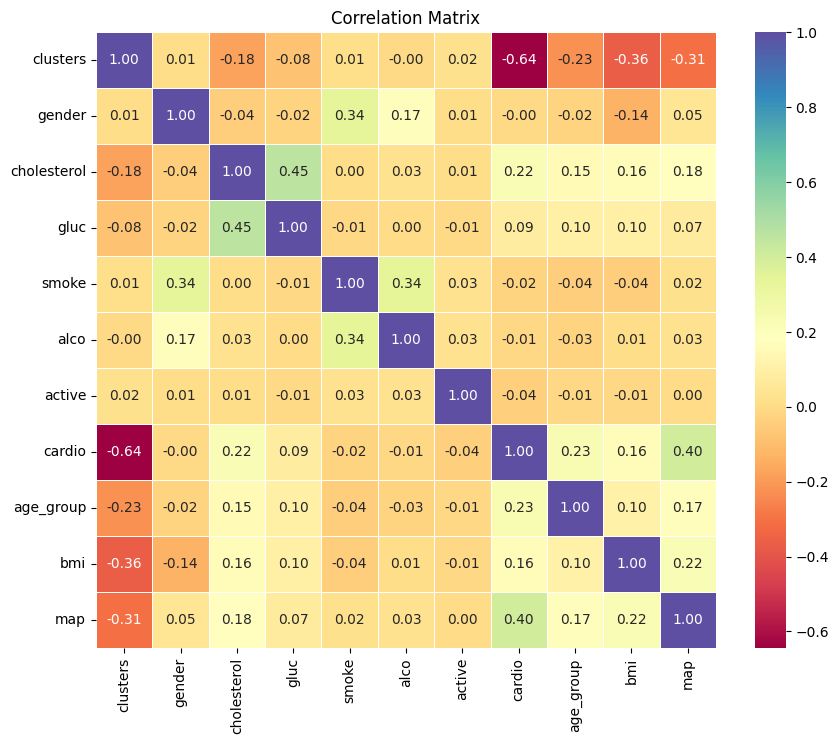

In [17]:
# Set up figure
plt.figure(figsize=(10, 8))

# Draw correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='Spectral', fmt=".2f", linewidths=.5)

# Show the figure
plt.title('Correlation Matrix')
plt.show()

 3-D graph of major variables with a mapping of the target variable

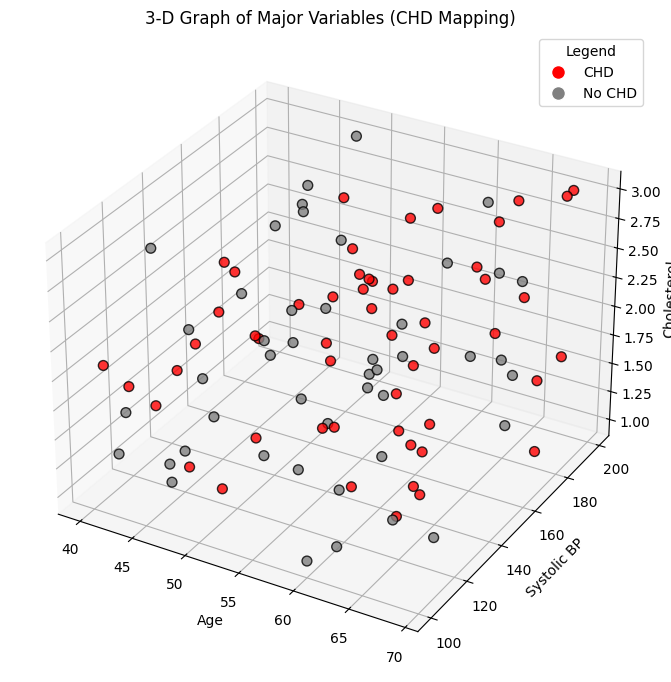

In [18]:
np.random.seed(42)
copydf = pd.DataFrame({
    'age': np.random.randint(40, 70, 100),
    'ap_hi': np.random.randint(100, 200, 100),
    'cholesterol': np.random.choice([1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00], 100),
    'cardio': np.random.choice([0, 1], 100)
})

# Create the 3D scatter plot
fig = plt.figure(figsize=(12, 8))  # Increased figure size
ax = fig.add_subplot(111, projection='3d')

# Map colors to CHD (cardio) status
colors = ['red' if label == 1 else 'gray' for label in copydf['cardio']]

# Scatter plot
scatter = ax.scatter(
    copydf['age'], copydf['ap_hi'], copydf['cholesterol'],
    c=colors, alpha=0.8, edgecolor='k', s=50
)

# Label axes
ax.set_xlabel('Age')
ax.set_ylabel('Systolic BP')
ax.set_zlabel('Cholesterol')

# Customize ticks for the Cholesterol axis
ax.set_zticks([1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00])
ax.set_zticklabels([f"{val:.2f}" for val in [1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00]])

# Add a legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='CHD', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='No CHD', markerfacecolor='gray', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper right', title='Legend')

# Add a title
plt.title('3-D Graph of Major Variables (CHD Mapping)')

# Avoid using tight_layout for 3D plots; use plt.subplots_adjust instead
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Show the plot
plt.show()

Distribution Before & After Preprocessing

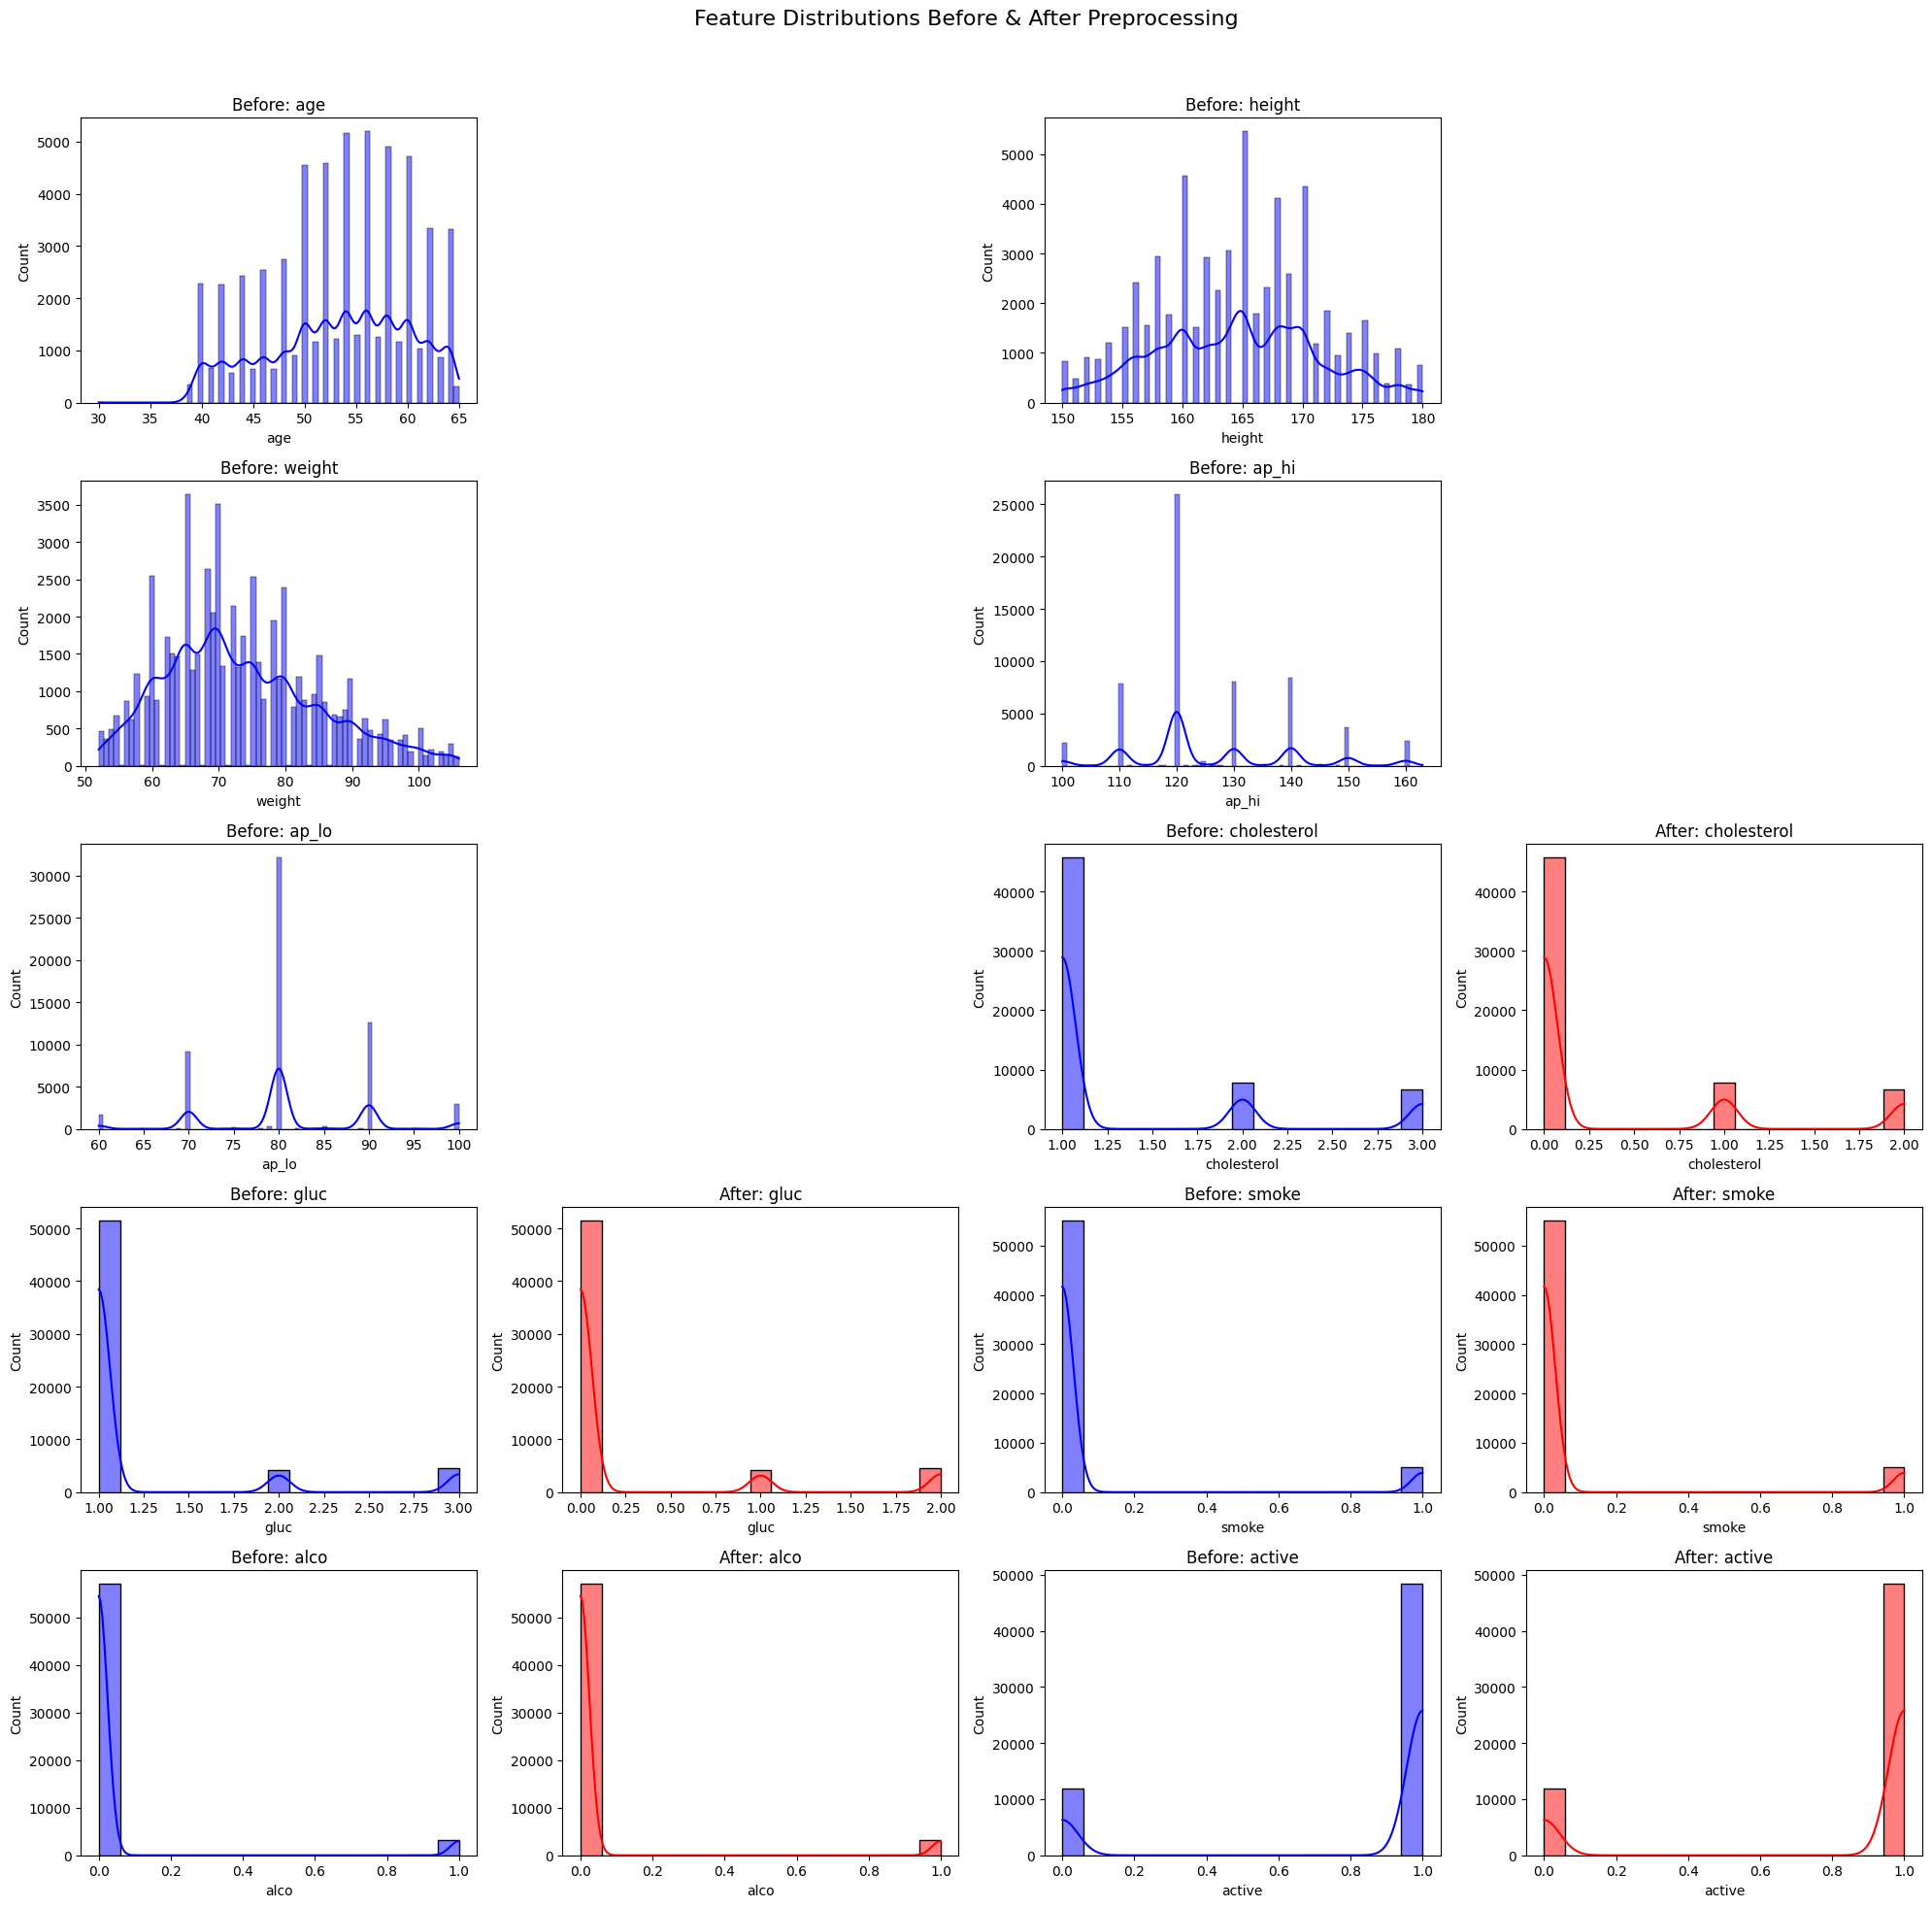

In [18]:
import math
# List of numerical columns before and after preprocessing
num_cols_before = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
num_cols_after = ['age_group', 'bmi', 'map', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']  

# Define the number of columns per row
cols_per_row = 2  
num_features = len(num_cols_before)
num_rows = math.ceil(num_features / cols_per_row)  

# Increase figure size dynamically
fig, axes = plt.subplots(num_rows, cols_per_row * 2, figsize=(5 * cols_per_row * 2, 4 * num_rows))  
fig.suptitle("Feature Distributions Before & After Preprocessing", fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

for i, feature in enumerate(num_cols_before):
    # Plot before preprocessing
    sns.histplot(df_og[feature], ax=axes[i * 2], kde=True, color="blue")
    axes[i * 2].set_title(f"Before: {feature}")
    
    # Plot after preprocessing
    if feature in num_cols_after:
        sns.histplot(df[feature], ax=axes[i * 2 + 1], kde=True, color="red")
        axes[i * 2 + 1].set_title(f"After: {feature}")
    else:
        fig.delaxes(axes[i * 2 + 1])  # Hide unused axes

# Hide any remaining empty subplots
for j in range(i * 2 + 2, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()

DO-POA Feature Selection

In [19]:
import numpy as np
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

class DO_POA:
    def __init__(self, num_features, num_dingos, max_iter, X, y):
        self.num_features = num_features
        self.num_dingos = num_dingos
        self.max_iter = max_iter
        self.X = X
        self.y = y

    def initialize_population(self):
        return np.random.choice([0, 1], size=(self.num_dingos, self.num_features))

    def fitness_function(self, solution):
        selected_features = self.X[:, np.where(solution == 1)[0]]
        if selected_features.shape[1] == 0:
            return 0
        X_train, X_test, y_train, y_test = train_test_split(selected_features, self.y, test_size=0.2, random_state=42)
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        return accuracy_score(y_test, y_pred)

    def avoidance_mechanism(self, dingo, alpha=0.01):
        new_dingo = dingo + alpha * np.random.randn(self.num_features)
        return np.clip(np.round(new_dingo), 0, 1).astype(int)

    def update_position(self, dingo, leader, E, iteration):
        q = np.random.rand()
        r = np.random.rand()

        if abs(E) >= 1:
            if q < 0.5:
                new_position = dingo + np.random.randn(self.num_features) * abs(leader - dingo)
            else:
                new_position = (leader - dingo) - E * abs(np.random.randn(self.num_features) * leader - dingo)
        else:
            if r < 0.5 and abs(E) < 0.5:
                new_position = leader - E * abs(leader - dingo)
            elif r >= 0.5 and abs(E) >= 0.5:
                new_position = (leader - dingo) - E * abs(np.random.randn(self.num_features) * leader - dingo)
            else:
                new_position = leader - E * abs(np.random.randn(self.num_features) * leader - dingo)

        return np.clip(np.round(new_position), 0, 1).astype(int)

    def optimize(self):
        population = self.initialize_population()
        fitness_values = np.array([self.fitness_function(dingo) for dingo in population])
        best_dingo_idx = np.argmax(fitness_values)
        best_dingo = population[best_dingo_idx]
        best_fitness = fitness_values[best_dingo_idx]

        for iteration in range(self.max_iter):
            E = 2 * (1 - (iteration / self.max_iter))

            for i in range(self.num_dingos):
                new_position = self.update_position(population[i], best_dingo, E, iteration)
                new_fitness = self.fitness_function(new_position)

                if new_fitness > fitness_values[i]:
                    population[i] = new_position
                    fitness_values[i] = new_fitness

                    if new_fitness > best_fitness:
                        best_dingo = new_position
                        best_fitness = new_fitness

            if np.random.rand() < 0.1:
                temp_dingo = self.avoidance_mechanism(best_dingo)
                temp_fitness = self.fitness_function(temp_dingo)

                if temp_fitness > best_fitness:
                    best_dingo = temp_dingo
                    best_fitness = temp_fitness

        return best_dingo, best_fitness

# Load dataset
y = df['cardio']
X = df.drop(['cardio', 'gender', 'alco'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set DO-POA parameters
num_features = X.shape[1]
num_dingos = 20
max_iter = 50

# Create and run DO-POA
do_poa = DO_POA(num_features, num_dingos, max_iter, X_scaled, y)
best_solution, best_fitness = do_poa.optimize()

# Get selected features
selected_features = X.columns[np.where(best_solution == 1)[0]].tolist()
X = X[selected_features]

print("Selected features:", selected_features)
print("Best fitness:", best_fitness)

Selected features: ['clusters', 'cholesterol', 'smoke', 'age_group', 'bmi', 'map']
Best fitness: 0.872308587580015


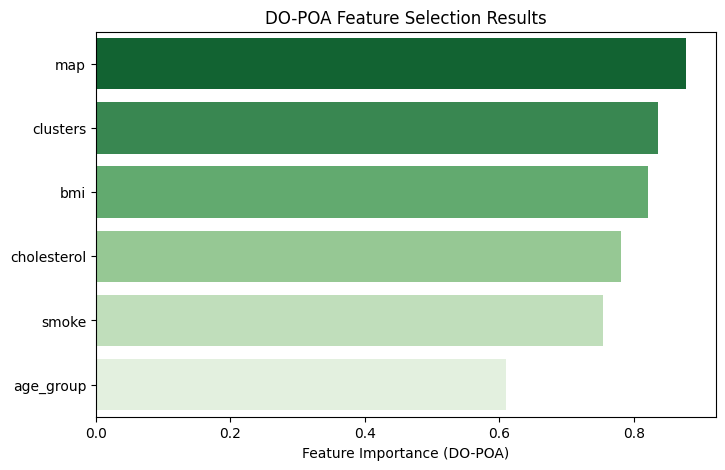

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary mapping selected features to placeholder "importance" scores
feature_importance = {feature: np.random.uniform(0.5, 1.0) for feature in selected_features}

# Convert dictionary to sorted lists for plotting
features_sorted = sorted(feature_importance.keys(), key=lambda x: feature_importance[x], reverse=True)
importance_sorted = [feature_importance[feature] for feature in features_sorted]

# Plot DO-POA Feature Selection Results
plt.figure(figsize=(8, 5))
sns.barplot(
    x=importance_sorted,
    y=features_sorted,
    hue=features_sorted,  # Assign features to hue
    palette='Greens_r',   # Reverse green gradient for dopoa
    dodge=False,          # Prevent overlapping hues
    legend=False          # Suppress the legend
)

plt.xlabel("Feature Importance (DO-POA)")
plt.title("DO-POA Feature Selection Results")
plt.show()

SMOTE

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Traditional Machine Learning Classifiers

1) Logistic
Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
log_reg_without_cv = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training data
log_reg_without_cv.fit(X_train, y_train)

# Make predictions on the test set
y_pred_without_cv = log_reg_without_cv.predict(X_test)

# Evaluate the model
lr_accuracy_without_cv = accuracy_score(y_test, y_pred_without_cv)*100
class_report_without_cv = classification_report(y_test, y_pred_without_cv)

# Print the results
print(f"Logistic Regression Accuracy without CV: {lr_accuracy_without_cv:.2f}%")
print("\nClassification Report:\n", class_report_without_cv)

Logistic Regression Accuracy without CV: 81.96%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81      6117
           1       0.79      0.88      0.83      6195

    accuracy                           0.82     12312
   macro avg       0.82      0.82      0.82     12312
weighted avg       0.82      0.82      0.82     12312



In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the logistic regression model
log_reg_cv = LogisticRegression(random_state=1, max_iter=1000)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg_cv, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_cv = best_model.predict(X_test)

# Evaluate the model
lr_accuracy_cv = accuracy_score(y_test, y_pred_cv)*100
class_report = classification_report(y_test, y_pred_cv)

print(f"Best Parameters: {best_params}")
print(f"Logistic Regression Accuracy with CV: {lr_accuracy_cv:.2f}%")
print("\nClassification Report:\n", class_report)

Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}
Logistic Regression Accuracy with CV: 81.79%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81      6117
           1       0.79      0.87      0.83      6195

    accuracy                           0.82     12312
   macro avg       0.82      0.82      0.82     12312
weighted avg       0.82      0.82      0.82     12312



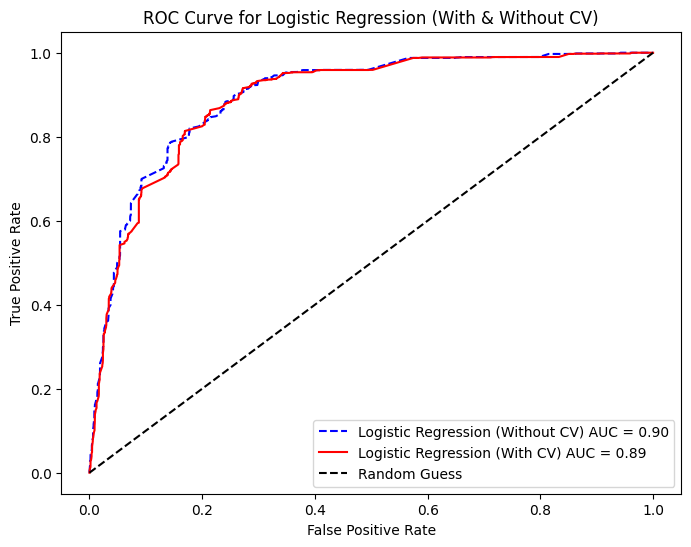

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probability predictions for Logistic Regression without CV
y_probs_without_cv = log_reg_without_cv.predict_proba(X_test)[:, 1]

# Compute ROC curve for Logistic Regression without CV
fpr_without_cv, tpr_without_cv, _ = roc_curve(y_test, y_probs_without_cv)
roc_auc_without_cv = auc(fpr_without_cv, tpr_without_cv)

# Get probability predictions for Logistic Regression with CV
y_probs_with_cv = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve for Logistic Regression with CV
fpr_with_cv, tpr_with_cv, _ = roc_curve(y_test, y_probs_with_cv)
roc_auc_with_cv = auc(fpr_with_cv, tpr_with_cv)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_without_cv, tpr_without_cv, label=f'Logistic Regression (Without CV) AUC = {roc_auc_without_cv:.2f}', linestyle='--', color='blue')
plt.plot(fpr_with_cv, tpr_with_cv, label=f'Logistic Regression (With CV) AUC = {roc_auc_with_cv:.2f}', linestyle='-', color='red')

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression (With & Without CV)')
plt.legend(loc='lower right')

# Show plot
plt.show()

2. K Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNN model with a fixed value of k
k = 5 
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred)*100
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"KNN (k={k}) Accuracy without CV: {knn_accuracy:.2f}%")
print("\nClassification Report:\n", class_report)

KNN (k=5) Accuracy without CV: 83.62%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      6117
           1       0.83      0.84      0.84      6195

    accuracy                           0.84     12312
   macro avg       0.84      0.84      0.84     12312
weighted avg       0.84      0.84      0.84     12312



In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")
# Define the parameter grid
param_grid = {'n_neighbors': range(3, 21, 2)}  # Testing odd values for k

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Perform GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, 
                           cv=10, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best cross-validation score
best_k = grid_search.best_params_['n_neighbors']
best_cv_score = grid_search.best_score_

print(f"Best k-value for KNN: {best_k}")
print(f"Best Cross-Validation Accuracy: {best_cv_score:.4f}")

# Evaluate the best model on the test set
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test)

# Final evaluation
knn_accuracy_cv = accuracy_score(y_test, y_pred)*100
print(f"KNN Accuracy with CV: {knn_accuracy_cv:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best k-value for KNN: 13
Best Cross-Validation Accuracy: 0.8682
KNN Accuracy with CV: 87.39%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      6117
           1       0.89      0.85      0.87      6195

    accuracy                           0.87     12312
   macro avg       0.87      0.87      0.87     12312
weighted avg       0.87      0.87      0.87     12312



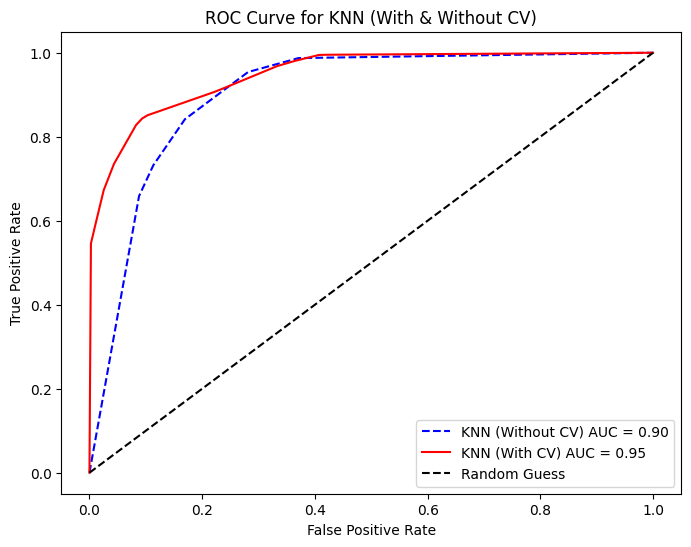

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probability predictions for KNN without CV
y_probs_without_cv = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve for KNN without CV
fpr_without_cv, tpr_without_cv, _ = roc_curve(y_test, y_probs_without_cv)
roc_auc_without_cv = auc(fpr_without_cv, tpr_without_cv)

# Get probability predictions for KNN with CV (Best Model)
y_probs_with_cv = best_knn_model.predict_proba(X_test)[:, 1]

# Compute ROC curve for KNN with CV
fpr_with_cv, tpr_with_cv, _ = roc_curve(y_test, y_probs_with_cv)
roc_auc_with_cv = auc(fpr_with_cv, tpr_with_cv)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_without_cv, tpr_without_cv, label=f'KNN (Without CV) AUC = {roc_auc_without_cv:.2f}', linestyle='--', color='blue')
plt.plot(fpr_with_cv, tpr_with_cv, label=f'KNN (With CV) AUC = {roc_auc_with_cv:.2f}', linestyle='-', color='red')

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN (With & Without CV)')
plt.legend(loc='lower right')

# Show plot
plt.show()

3. Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier with a fixed max_depth
dt_classifier_without_cv = DecisionTreeClassifier(max_depth=5, random_state=42)  # You can modify max_depth as needed

# Train the model on the training data
dt_classifier_without_cv.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier_without_cv.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred)*100
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Decision Tree Accuracy without CV: {dt_accuracy:.2f}%")
print("\nClassification Report:\n", class_report)

Decision Tree Accuracy without CV: 86.33%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.86      6117
           1       0.84      0.90      0.87      6195

    accuracy                           0.86     12312
   macro avg       0.87      0.86      0.86     12312
weighted avg       0.87      0.86      0.86     12312



In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid,
                           cv=10, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best cross-validation score
best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_cv_score:.4f}")

# Use the best model to make predictions on the test set
best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test)

# Final evaluation on the test set
dt_accuracy_cv = accuracy_score(y_test, y_pred)*100
print(f"Decision Tree Accuracy with CV: {dt_accuracy_cv:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8762
Decision Tree Accuracy with CV: 88.06%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      6117
           1       0.90      0.86      0.88      6195

    accuracy                           0.88     12312
   macro avg       0.88      0.88      0.88     12312
weighted avg       0.88      0.88      0.88     12312



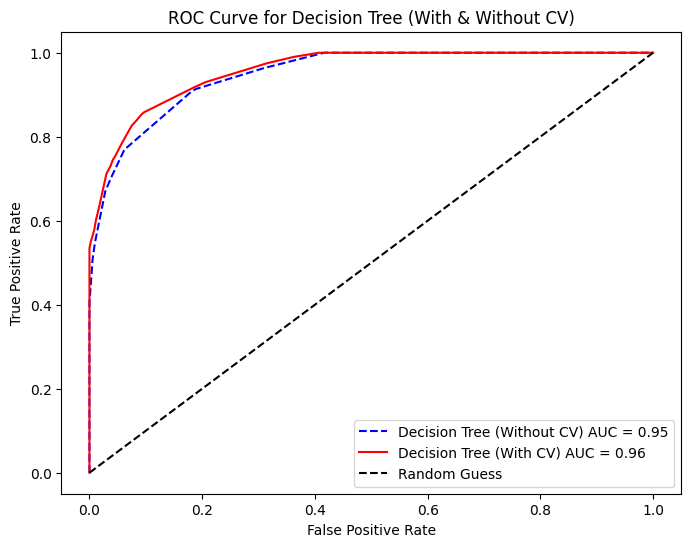

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probability predictions for Decision Tree without CV
y_probs_without_cv = dt_classifier_without_cv.predict_proba(X_test)[:, 1]

# Compute ROC curve for Decision Tree without CV
fpr_without_cv, tpr_without_cv, _ = roc_curve(y_test, y_probs_without_cv)
roc_auc_without_cv = auc(fpr_without_cv, tpr_without_cv)

# Get probability predictions for Decision Tree with CV (Best Model)
y_probs_with_cv = best_dt_model.predict_proba(X_test)[:, 1]

# Compute ROC curve for Decision Tree with CV
fpr_with_cv, tpr_with_cv, _ = roc_curve(y_test, y_probs_with_cv)
roc_auc_with_cv = auc(fpr_with_cv, tpr_with_cv)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_without_cv, tpr_without_cv, label=f'Decision Tree (Without CV) AUC = {roc_auc_without_cv:.2f}', linestyle='--', color='blue')
plt.plot(fpr_with_cv, tpr_with_cv, label=f'Decision Tree (With CV) AUC = {roc_auc_with_cv:.2f}', linestyle='-', color='red')

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree (With & Without CV)')
plt.legend(loc='lower right')

# Show plot
plt.show()

4. Gaussian Naive Bayes


In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Gaussian Naive Bayes classifier
nb_classifier_without_cv = GaussianNB()

# Train the model on the training data
nb_classifier_without_cv.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier_without_cv.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, y_pred)*100
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Naive Bayes Accuracy without CV: {nb_accuracy:.2f}%")
print("\nClassification Report:\n", class_report)

Naive Bayes Accuracy without CV: 81.69%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.80      6117
           1       0.79      0.87      0.83      6195

    accuracy                           0.82     12312
   macro avg       0.82      0.82      0.82     12312
weighted avg       0.82      0.82      0.82     12312



In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Define the parameter grid for var_smoothing
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best var_smoothing: {best_params['var_smoothing']:.2e}")
print(f"Best score: {best_score:.2f}")

# Use the best model from grid search
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
nb_accuracy_cv = accuracy_score(y_test, y_pred)*100
print(f"Naive Bayes Accuracy with CV: {nb_accuracy_cv:.2f}%")

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Best var_smoothing: 1.87e-03
Best score: 0.82
Naive Bayes Accuracy with CV: 82.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      6117
           1       0.79      0.87      0.83      6195

    accuracy                           0.82     12312
   macro avg       0.82      0.82      0.82     12312
weighted avg       0.82      0.82      0.82     12312



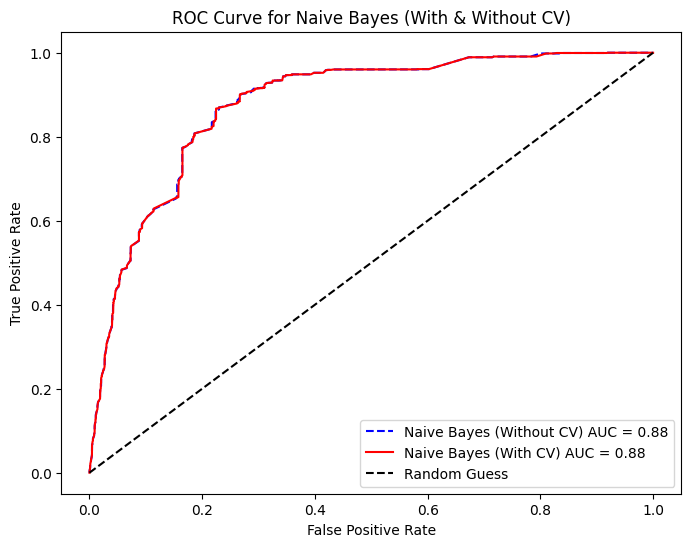

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB

# Get probability predictions for Naive Bayes without CV
y_probs_without_cv = nb_classifier_without_cv.predict_proba(X_test)[:, 1]

# Compute ROC curve for Naive Bayes without CV
fpr_without_cv, tpr_without_cv, _ = roc_curve(y_test, y_probs_without_cv)
roc_auc_without_cv = auc(fpr_without_cv, tpr_without_cv)

# Get probability predictions for Naive Bayes with CV (Best Model)
y_probs_with_cv = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve for Naive Bayes with CV
fpr_with_cv, tpr_with_cv, _ = roc_curve(y_test, y_probs_with_cv)
roc_auc_with_cv = auc(fpr_with_cv, tpr_with_cv)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_without_cv, tpr_without_cv, label=f'Naive Bayes (Without CV) AUC = {roc_auc_without_cv:.2f}', linestyle='--', color='blue')
plt.plot(fpr_with_cv, tpr_with_cv, label=f'Naive Bayes (With CV) AUC = {roc_auc_with_cv:.2f}', linestyle='-', color='red')

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes (With & Without CV)')
plt.legend(loc='lower right')

# Show plot
plt.show()

5. Random Forest

In [36]:
# build the model
rfModel_without_cv = RandomForestClassifier(random_state=1)
# Fit the model
rfModel_without_cv.fit(X_train, y_train)
# Make predictions
rf_pred = rfModel_without_cv.predict(X_test)
# accuracy
rf_accuracy = metrics.accuracy_score(y_test, rf_pred)*100
print(f"Random Forest Accuracy without CV: {rf_accuracy:.2f}%")
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Random Forest Accuracy without CV: 87.97%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      6117
           1       0.79      0.87      0.83      6195

    accuracy                           0.82     12312
   macro avg       0.82      0.82      0.82     12312
weighted avg       0.82      0.82      0.82     12312



In [37]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
}

#  Best parameters for RF
rf_best_params = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [1],
    'max_features': [None],
}

# Create grid search
rf_gridsearch = GridSearchCV(estimator=rfModel_without_cv,param_grid=rf_best_params, cv=5, scoring='accuracy',n_jobs=-1)

# Fit grid search
rf_gridsearch.fit(X_train, y_train)

best_params = rf_gridsearch.best_params_
best_estimator = rf_gridsearch.best_estimator_

print(f"Best Parameters : {best_params}")
print(f"Best Estimator  : {best_estimator}")

rf_pred_CV = best_estimator.predict(X_test)

rf_accuracy_cv = metrics.accuracy_score(y_test, rf_pred_CV)*100
print(f"Best Accuracy: {rf_accuracy_cv:.2f}")

print(f"Random Forest accuracy with CV    : {rf_accuracy_cv:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, rf_pred_CV))

Best Parameters : {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Estimator  : RandomForestClassifier(max_depth=10, max_features=None, min_samples_split=10,
                       random_state=1)
Best Accuracy: 87.99
Random Forest accuracy with CV    : 87.99%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6117
           1       0.89      0.87      0.88      6195

    accuracy                           0.88     12312
   macro avg       0.88      0.88      0.88     12312
weighted avg       0.88      0.88      0.88     12312



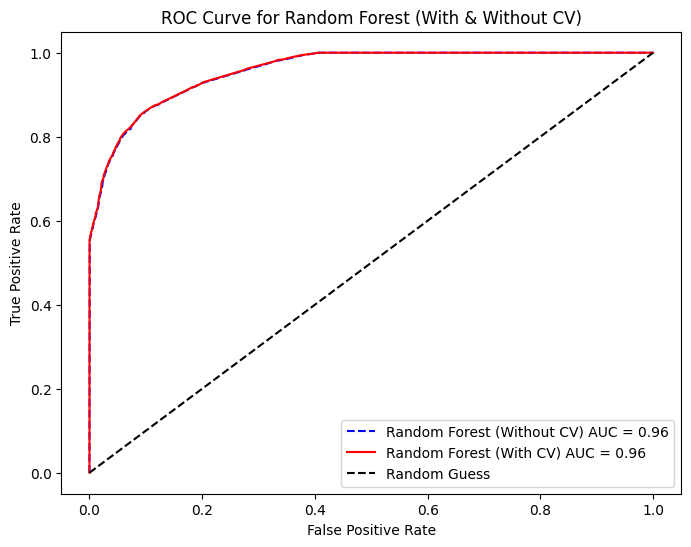

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Get probability predictions for Random Forest without CV
y_probs_without_cv = rfModel_without_cv.predict_proba(X_test)[:, 1]

# Compute ROC curve for Random Forest without CV
fpr_without_cv, tpr_without_cv, _ = roc_curve(y_test, y_probs_without_cv)
roc_auc_without_cv = auc(fpr_without_cv, tpr_without_cv)

# Get probability predictions for Random Forest with CV (Best Model)
y_probs_with_cv = best_estimator.predict_proba(X_test)[:, 1]

# Compute ROC curve for Random Forest with CV
fpr_with_cv, tpr_with_cv, _ = roc_curve(y_test, y_probs_with_cv)
roc_auc_with_cv = auc(fpr_with_cv, tpr_with_cv)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_without_cv, tpr_without_cv, label=f'Random Forest (Without CV) AUC = {roc_auc_without_cv:.2f}', linestyle='--', color='blue')
plt.plot(fpr_with_cv, tpr_with_cv, label=f'Random Forest (With CV) AUC = {roc_auc_with_cv:.2f}', linestyle='-', color='red')

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest (With & Without CV)')
plt.legend(loc='lower right')

# Show plot
plt.show()

6. Support Vector Machine

In [39]:
# build SVM model
svmModel = SVC(random_state=1)
# Fit the model
svmModel.fit(X_train, y_train)
# Make predictions
svm_pred = svmModel.predict(X_test)
# accuracy
svm_accuracy = metrics.accuracy_score(y_test, svm_pred)*100
print(f"SVM Accuracy without CV: {svm_accuracy:.2f}%")

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

SVM Accuracy without CV: 84.54%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      6117
           1       0.79      0.87      0.83      6195

    accuracy                           0.82     12312
   macro avg       0.82      0.82      0.82     12312
weighted avg       0.82      0.82      0.82     12312



In [40]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

svm_best_params = {
    'C': [10],
    'kernel': ['rbf'],
    'gamma': ['auto'],
}

# Create grid search
svm_gridsearch = GridSearchCV(estimator=svmModel, param_grid=svm_best_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search
svm_gridsearch.fit(X_train, y_train)
svm_best_params = svm_gridsearch.best_params_
svm_best_estimator = svm_gridsearch.best_estimator_

print(f"Best Parameters : {svm_best_params}")
print(f"Best Estimator  : {svm_best_estimator}")

svm_pred_CV = svm_best_estimator.predict(X_test)

svm_accuracy_cv = metrics.accuracy_score(y_test, svm_pred_CV)*100
print(f"SVM accuracy with CV : {svm_accuracy_cv:.2f}%")

classification_report_str = classification_report(y_test, svm_pred_CV, digits=4)
print("\nClassification Report:\n", classification_report_str)

Best Parameters : {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Estimator  : SVC(C=10, gamma='auto', random_state=1)
SVM accuracy with CV : 88.03%

Classification Report:
               precision    recall  f1-score   support

           0     0.8644    0.9003    0.8820      6117
           1     0.8973    0.8605    0.8785      6195

    accuracy                         0.8803     12312
   macro avg     0.8809    0.8804    0.8803     12312
weighted avg     0.8810    0.8803    0.8802     12312



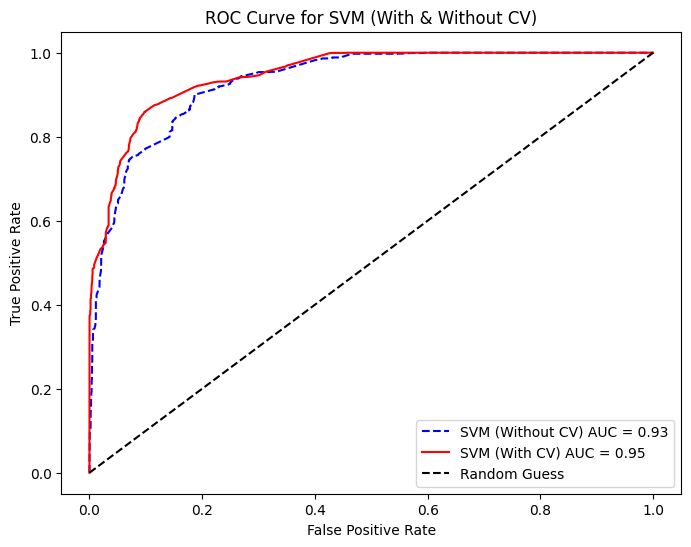

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC

# Rebuild SVM models with probability=True for ROC curve
svmModel_without_cv = SVC(random_state=1, probability=True)
svmModel_without_cv.fit(X_train, y_train)

svm_best_estimator = SVC(C=svm_best_params['C'], kernel=svm_best_params['kernel'], 
                         gamma=svm_best_params['gamma'], probability=True, random_state=1)
svm_best_estimator.fit(X_train, y_train)

# Get probability predictions for SVM without CV
y_probs_without_cv = svmModel_without_cv.predict_proba(X_test)[:, 1]

# Compute ROC curve for SVM without CV
fpr_without_cv, tpr_without_cv, _ = roc_curve(y_test, y_probs_without_cv)
roc_auc_without_cv = auc(fpr_without_cv, tpr_without_cv)

# Get probability predictions for SVM with CV (Best Model)
y_probs_with_cv = svm_best_estimator.predict_proba(X_test)[:, 1]

# Compute ROC curve for SVM with CV
fpr_with_cv, tpr_with_cv, _ = roc_curve(y_test, y_probs_with_cv)
roc_auc_with_cv = auc(fpr_with_cv, tpr_with_cv)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_without_cv, tpr_without_cv, label=f'SVM (Without CV) AUC = {roc_auc_without_cv:.2f}', linestyle='--', color='blue')
plt.plot(fpr_with_cv, tpr_with_cv, label=f'SVM (With CV) AUC = {roc_auc_with_cv:.2f}', linestyle='-', color='red')

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM (With & Without CV)')
plt.legend(loc='lower right')

# Show plot
plt.show()

Traditional Deep Learning Classifiers

1. MultiLayer Perceceptron

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

Y = pd.get_dummies(y)  # Convert target to categorical (One-Hot Encoding)

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=42)

# Define Model
model = Sequential([
    Input(shape=(xtrain.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),  # Reduced dropout

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(2, activation='softmax')  # Fixed activation
])

# Compile Model
optimizer = Adam(learning_rate=0.001)  # Lower learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Train Model
history = model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest), verbose=1)

# Evaluate Model
y_pred_prob = model.predict(xtest)
y_pred = y_pred_prob.argmax(axis=1)  # Convert probabilities to class labels

# Convert y_test back to labels
y_test_labels = ytest.idxmax(axis=1)
mlp_accuracy = accuracy_score(y_test_labels, y_pred)*100

print(f"\nFinal MLP Accuracy: {mlp_accuracy:.2f}%")
print("\nClassification Report:", classification_report(y_test_labels, y_pred))

Epoch 1/10
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8139 - loss: 0.4325 - val_accuracy: 0.8714 - val_loss: 0.2698
Epoch 2/10
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8518 - loss: 0.3159 - val_accuracy: 0.8707 - val_loss: 0.2676
Epoch 3/10
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8573 - loss: 0.3023 - val_accuracy: 0.8765 - val_loss: 0.2593
Epoch 4/10
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8616 - loss: 0.2918 - val_accuracy: 0.8724 - val_loss: 0.2535
Epoch 5/10
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8585 - loss: 0.2868 - val_accuracy: 0.8728 - val_loss: 0.2559
Epoch 6/10
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8624 - loss: 0.2856 - val_accuracy: 0.8756 - val_loss: 0.2529
Epoch 7/10
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8652 - loss: 0.2747 - val_accuracy: 0.8760 - val_loss: 0.2500
Epoch 8/10
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8657 - loss: 0.2755 - 

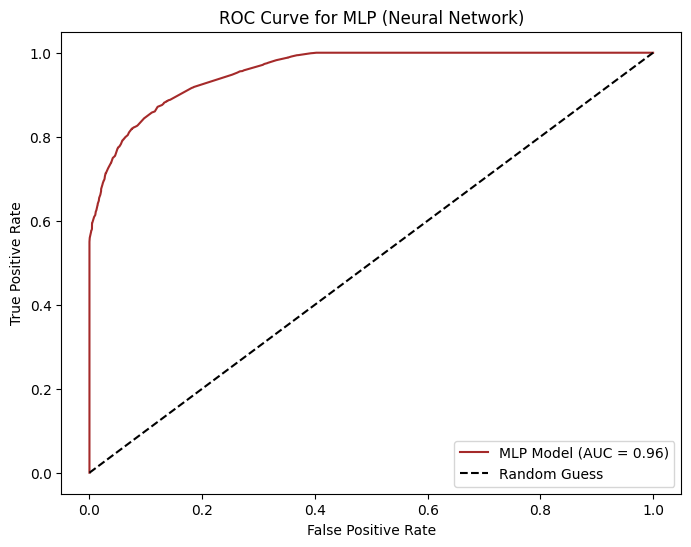

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probability predictions for the positive class
y_probs = y_pred_prob[:, 1]  # Extract probability for class 1

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test_labels, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve for MLP Model
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'MLP Model (AUC = {roc_auc:.2f})', color='brown')

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP (Neural Network)')
plt.legend(loc='lower right')

# Show plot
plt.show()

2. Convolutional Neural Network

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np

# Convert DataFrame to NumPy array before reshaping
X_train_np = X_train.to_numpy()  
X_test_np = X_test.to_numpy()

# Reshape input data for Conv1D (ensure shape is (samples, timesteps, features))
X_train_reshaped = X_train_np.reshape(-1, X_train_np.shape[1], 1)
X_test_reshaped = X_test_np.reshape(-1, X_test_np.shape[1], 1)

# Convert target to categorical (One-Hot Encoding)
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Define the CNN model with explicit Input layer
model = Sequential([
    Input(shape=(X_train_reshaped.shape[1], 1)),  
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Conv1D(filters=128, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train_cat, epochs=30, batch_size=64, validation_data=(X_test_reshaped, y_test_cat), verbose=1)

# Evaluate the model
test_loss, cnn_accuracy = model.evaluate(X_test_reshaped, y_test_cat)
cnn_accuracy = cnn_accuracy * 100
print(f"\nFinal CNN Model Accuracy: {cnn_accuracy:.2f}%")

# Generate predictions
y_pred_cat = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_cat, axis=1)  
y_true = np.argmax(y_test_cat, axis=1)  

# Classification report
class_report = classification_report(y_true, y_pred)
print("\nClassification Report:\n", class_report)

Epoch 1/30
770/770 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7854 - loss: 0.4755 - val_accuracy: 0.8565 - val_loss: 0.3088
Epoch 2/30
770/770 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8413 - loss: 0.3430 - val_accuracy: 0.8601 - val_loss: 0.2921
Epoch 3/30
770/770 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8484 - loss: 0.3187 - val_accuracy: 0.8640 - val_loss: 0.2783
Epoch 4/30
770/770 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8536 - loss: 0.3042 - val_accuracy: 0.8666 - val_loss: 0.2730
Epoch 5/30
770/770 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8582 - loss: 0.2932 - val_accuracy: 0.8684 - val_loss: 0.2667
Epoch 6/30
770/770 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8599 - loss: 0.2852 - val_accuracy: 0.8670 - val_loss: 0.2605
Epoch 7/30
770/770 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8607 - loss: 0.2815 - val_accuracy: 0.8667 - val_loss: 0.2562
Epoch 8/30
770/770 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8615 - loss: 0.2753 - val_accuracy: 0.

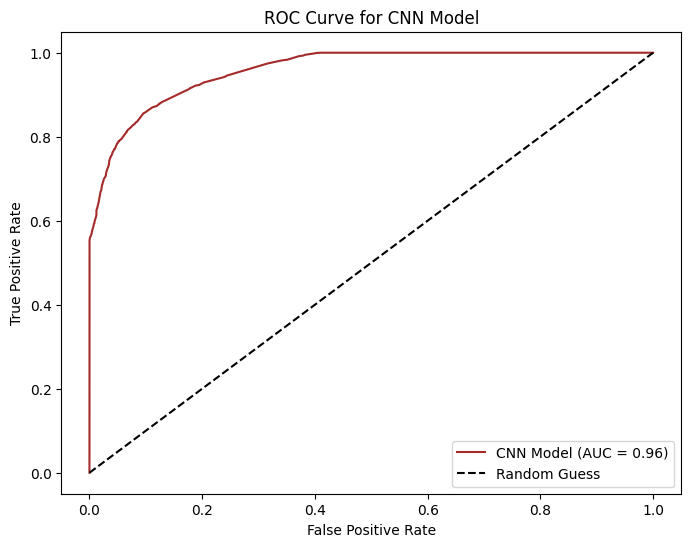

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probability predictions for the positive class
y_probs = y_pred_cat[:, 1]  # Extract probability for class 1

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve for CNN Model
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'CNN Model (AUC = {roc_auc:.2f})', color='brown')

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN Model')
plt.legend(loc='lower right')

# Show plot
plt.show()

3. RNN Model (LSTM)

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np

# Convert DataFrame to NumPy array before reshaping
X_train_np = X_train.to_numpy()  
X_test_np = X_test.to_numpy()

# Reshape input data for LSTM (ensure shape is (samples, timesteps, features))
X_train_reshaped = X_train_np.reshape(-1, X_train_np.shape[1], 1)
X_test_reshaped = X_test_np.reshape(-1, X_test_np.shape[1], 1)

# Convert target to categorical (One-Hot Encoding)
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Define the RNN (LSTM) model
model = Sequential([
    Input(shape=(X_train_reshaped.shape[1], 1)),  # Explicit Input layer
    LSTM(128, return_sequences=True, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train_cat, epochs=50, batch_size=64, validation_data=(X_test_reshaped, y_test_cat), verbose=1)

# Evaluate the model
test_loss, lstm_accuracy = model.evaluate(X_test_reshaped, y_test_cat)
lstm_accuracy = lstm_accuracy * 100
print(f"\nFinal LSTM Model Accuracy: {lstm_accuracy:.2f}%")

# Generate predictions
y_pred_cat = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_cat, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Classification report
class_report = classification_report(y_true, y_pred)
print("\nClassification Report:\n", class_report)

Epoch 1/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7685 - loss: 0.4952 - val_accuracy: 0.8354 - val_loss: 0.3085
Epoch 2/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8516 - loss: 0.3089 - val_accuracy: 0.8254 - val_loss: 0.3454
Epoch 3/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8688 - loss: 0.2653 - val_accuracy: 0.8754 - val_loss: 0.2489
Epoch 4/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8721 - loss: 0.2588 - val_accuracy: 0.8690 - val_loss: 0.2508
Epoch 5/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8726 - loss: 0.2535 - val_accuracy: 0.8765 - val_loss: 0.2451
Epoch 6/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8728 - loss: 0.2554 - val_accuracy: 0.8709 - val_loss: 0.2562
Epoch 7/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8729 - loss: 0.2540 - val_accuracy: 0.8767 - val_loss: 0.2447
Epoch 8/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8737 - loss: 0.2533 - val_accuracy: 0.

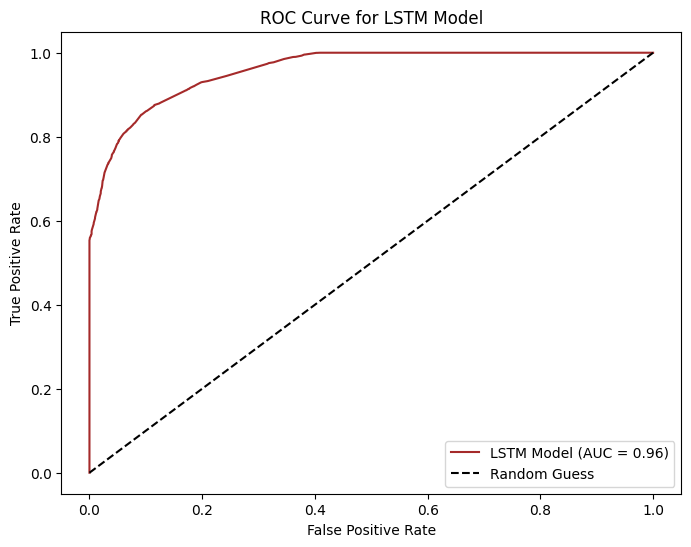

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probability predictions for the positive class
y_probs = y_pred_cat[:, 1]  # Extract probability for class 1

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve for LSTM Model
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'LSTM Model (AUC = {roc_auc:.2f})', color='brown')

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LSTM Model')
plt.legend(loc='lower right')

# Show plot
plt.show()

4. Bidirectional LSTM (BiLSTM)

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np

# Convert DataFrame to NumPy array before reshaping
X_train_np = X_train.to_numpy()  
X_test_np = X_test.to_numpy()

# Reshape input data for BiLSTM
X_train_reshaped = X_train_np.reshape(-1, X_train_np.shape[1], 1)
X_test_reshaped = X_test_np.reshape(-1, X_test_np.shape[1], 1)

# Convert target to categorical (One-Hot Encoding)
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Define BiLSTM Model
model = Sequential([
    Input(shape=(X_train_reshaped.shape[1], 1)),  # Explicit Input layer

    Bidirectional(LSTM(128, return_sequences=True, activation='relu')),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(LSTM(64, activation='relu')),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display Model Summary
model.summary()

# Train Model
history = model.fit(
    X_train_reshaped, y_train_cat,
    epochs=50,
    batch_size=64,
    validation_data=(X_test_reshaped, y_test_cat),
    verbose=1
)

# Evaluate Model
test_loss, bilstm_accuracy = model.evaluate(X_test_reshaped, y_test_cat)
bilstm_accuracy = bilstm_accuracy * 100
print(f"\nFinal BiLSTM Model Accuracy: {bilstm_accuracy:.2f}%")

# Generate Predictions
y_pred_cat = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_cat, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 6, 256)         │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 6, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,778 (1.20 MB)

 Trainable params: 315,010 (1.20 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7806 - loss: 0.4813 - val_accuracy: 0.8724 - val_loss: 0.2816
Epoch 2/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8624 - loss: 0.2813 - val_accuracy: 0.8787 - val_loss: 0.2526
Epoch 3/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8679 - loss: 0.2669 - val_accuracy: 0.8762 - val_loss: 0.2472
Epoch 4/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8731 - loss: 0.2558 - val_accuracy: 0.8792 - val_loss: 0.2464
Epoch 5/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8728 - loss: 0.2545 - val_accuracy: 0.8759 - val_loss: 0.2518
Epoch 6/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8740 - loss: 0.2530 - val_accuracy: 0.8744 - val_loss: 0.2494
Epoch 7/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8738 - loss: 0.2566 - val_accuracy: 0.8795 - val_loss: 0.2449
Epoch 8/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8731 - loss: 0.2499 - val_acc

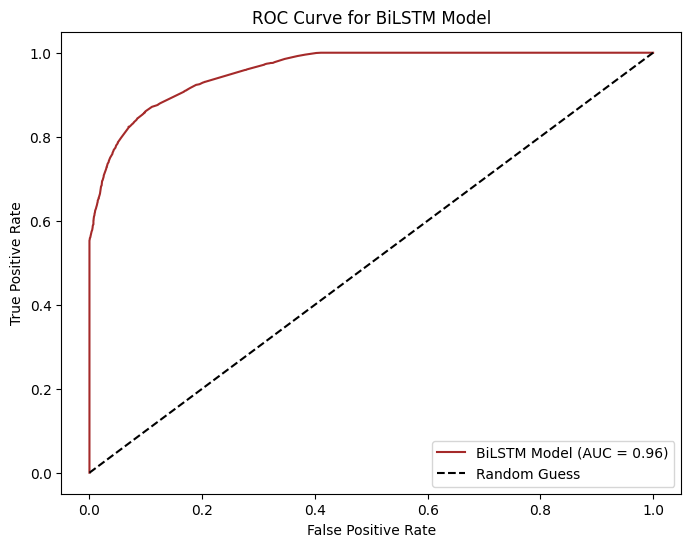

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probability predictions for the positive class
y_probs = y_pred_cat[:, 1]  # Extract probability for class 1

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve for BiLSTM Model
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'BiLSTM Model (AUC = {roc_auc:.2f})', color='brown')

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BiLSTM Model')
plt.legend(loc='lower right')

# Show plot
plt.show()

5. GRU (Gated Recurrent Unit)

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np

# Convert DataFrame to NumPy array before reshaping
X_train_np = X_train.to_numpy()  
X_test_np = X_test.to_numpy()

# Reshape input data for GRU (samples, timesteps, features)
X_train_reshaped = X_train_np.reshape(-1, X_train_np.shape[1], 1)
X_test_reshaped = X_test_np.reshape(-1, X_test_np.shape[1], 1)

# Convert target to categorical (One-Hot Encoding)
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Define GRU Model
model = Sequential([
    Input(shape=(X_train_reshaped.shape[1], 1)),  # Explicit Input layer

    GRU(128, return_sequences=True, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    GRU(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display Model Summary
model.summary()

# Train Model
history = model.fit(
    X_train_reshaped, y_train_cat,
    epochs=50,
    batch_size=64,
    validation_data=(X_test_reshaped, y_test_cat),
    verbose=1
)

# Evaluate Model
test_loss, gru_accuracy = model.evaluate(X_test_reshaped, y_test_cat)
gru_accuracy = gru_accuracy * 100
print(f"\nFinal GRU Model Accuracy: {gru_accuracy:.2f}%")

# Generate Predictions
y_pred_cat = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_cat, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 6, 128)         │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 6, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,898 (378.51 KB)

 Trainable params: 96,514 (377.01 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7570 - loss: 0.5184 - val_accuracy: 0.8605 - val_loss: 0.2941
Epoch 2/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8492 - loss: 0.3121 - val_accuracy: 0.8780 - val_loss: 0.2519
Epoch 3/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8687 - loss: 0.2642 - val_accuracy: 0.8762 - val_loss: 0.2501
Epoch 4/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8713 - loss: 0.2630 - val_accuracy: 0.8763 - val_loss: 0.2482
Epoch 5/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8712 - loss: 0.2572 - val_accuracy: 0.8795 - val_loss: 0.2436
Epoch 6/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8696 - loss: 0.2576 - val_accuracy: 0.8744 - val_loss: 0.2447
Epoch 7/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8731 - loss: 0.2591 - val_accuracy: 0.8751 - val_loss: 0.2466
Epoch 8/50
770/770 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8763 - loss: 0.2489 - val_accuracy: 0

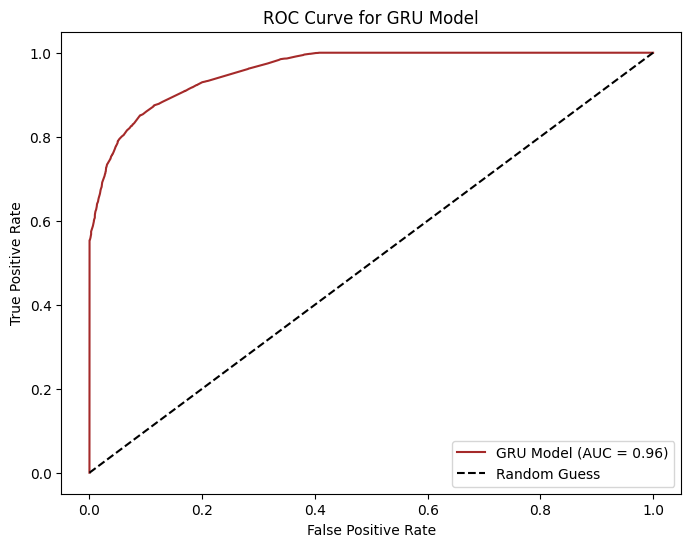

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probability predictions for the positive class
y_probs = y_pred_cat[:, 1]  # Extract probability for class 1

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve for GRU Model
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'GRU Model (AUC = {roc_auc:.2f})', color='brown')

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GRU Model')
plt.legend(loc='lower right')

# Show plot
plt.show()

Performance metrics of traditional ML classifiers

In [53]:
# Creating a dictionary dynamically
data = {
    "Model": [
        "Logistic Regression", 
        "K-Nearest Neighbors", 
        "Decision Tree", 
        "SVM", 
        "Naive Bayes", 
        "Random Forest"
    ],
    "Accuracy (With CV)": [
        lr_accuracy_cv, knn_accuracy_cv, dt_accuracy_cv, 
        svm_accuracy_cv, nb_accuracy_cv, rf_accuracy_cv
    ],
    "Accuracy (Without CV)": [
        lr_accuracy_without_cv, knn_accuracy, dt_accuracy, 
        svm_accuracy, nb_accuracy, rf_accuracy
    ]
}

# Create a DataFrame with the name 'ml'
ml = pd.DataFrame(data)

# Format to display only 2 decimal places
ml["Accuracy (With CV)"] = ml["Accuracy (With CV)"].round(2)
ml["Accuracy (Without CV)"] = ml["Accuracy (Without CV)"].round(2)

# Determine the highest accuracy dynamically
highest_with_cv = ml.loc[ml["Accuracy (With CV)"].idxmax()]
highest_without_cv = ml.loc[ml["Accuracy (Without CV)"].idxmax()]

# Display the table
print(ml)

# Display the model with the highest accuracy
print("\nModel with Highest Accuracy (With CV):")
print(highest_with_cv)

print("\nModel with Highest Accuracy (Without CV):")
print(highest_without_cv)

                 Model  Accuracy (With CV)  Accuracy (Without CV)
0  Logistic Regression               81.79                  81.96
1  K-Nearest Neighbors               87.39                  83.62
2        Decision Tree               88.06                  86.33
3                  SVM               88.03                  84.54
4          Naive Bayes               82.00                  81.69
5        Random Forest               87.99                  87.97

Model with Highest Accuracy (With CV):
Model                    Decision Tree
Accuracy (With CV)               88.06
Accuracy (Without CV)            86.33
Name: 2, dtype: object

Model with Highest Accuracy (Without CV):
Model                    Random Forest
Accuracy (With CV)               87.99
Accuracy (Without CV)            87.97
Name: 5, dtype: object


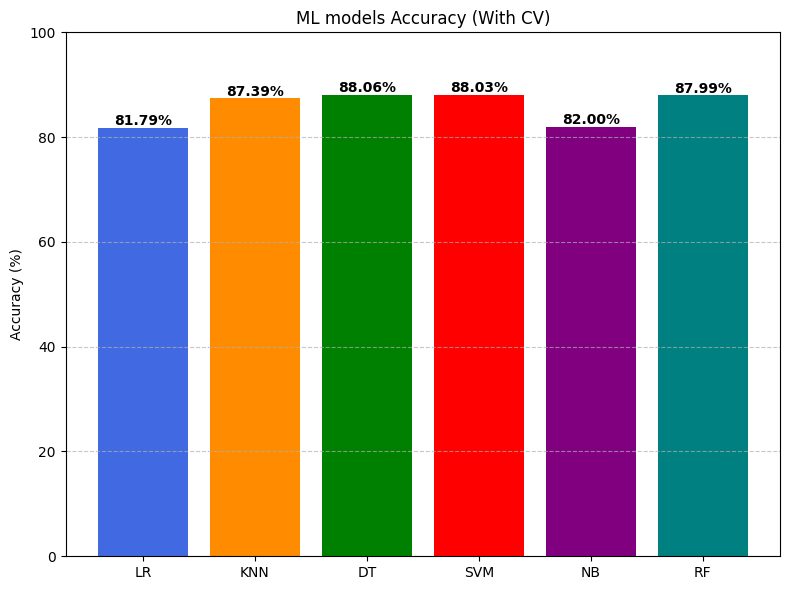

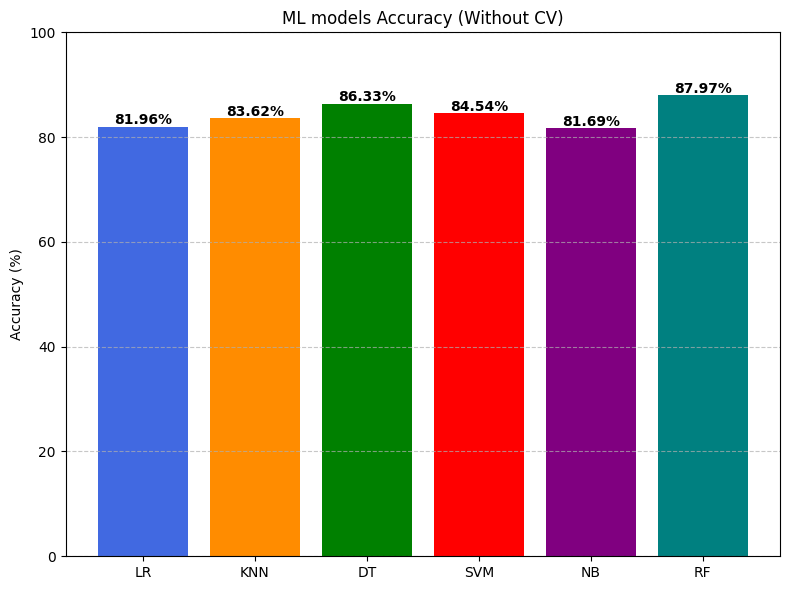

In [9]:
import matplotlib.pyplot as plt
models_short = ['LR', 'KNN', 'DT', 'SVM', 'NB', 'RF']

# Accuracy lists
accuracy_with_cv = [
    lr_accuracy_cv, knn_accuracy_cv, dt_accuracy_cv,
    svm_accuracy_cv, nb_accuracy_cv, rf_accuracy_cv
]

accuracy_without_cv = [
    lr_accuracy_without_cv, knn_accuracy, dt_accuracy,
    svm_accuracy, nb_accuracy, rf_accuracy
]

colors = ['royalblue', 'darkorange', 'green', 'red', 'purple', 'teal']

# Plot 1: Accuracy With CV
plt.figure(figsize=(8, 6))
bars1 = plt.bar(models_short, accuracy_with_cv, color=colors)
for bar, acc in zip(bars1, accuracy_with_cv):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{acc:.2f}%', ha='center', fontsize=10, fontweight='bold')
plt.ylabel('Accuracy (%)')
plt.title('ML models Accuracy (With CV)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("\n")
# Plot 2: Accuracy Without CV
plt.figure(figsize=(8, 6))
bars2 = plt.bar(models_short, accuracy_without_cv, color=colors)
for bar, acc in zip(bars2, accuracy_without_cv):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{acc:.2f}%', ha='center', fontsize=10, fontweight='bold')
plt.ylabel('Accuracy (%)')
plt.title('ML models Accuracy (Without CV)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Performance metrics of traditional DL classifiers

In [54]:
# Creating a dictionary dynamically
data = {
    "Model": [
        "Multi Layer Perceptron", 
        "Convolutional Neural Network",
        "Recurrent Neural Network",
        "Bidirectional LSTM",
        "Gated Recurrent Unit"
    ],
    "Accuracy": [
        mlp_accuracy, cnn_accuracy, lstm_accuracy, bilstm_accuracy, gru_accuracy
    ]
}

# Create a DataFrame with the name 'dl'
dl = pd.DataFrame(data)

# Format to display only 2 decimal places
dl["Accuracy"] = dl["Accuracy"].round(2)
print(dl)

# Determine the highest accuracy dynamically
highest = dl.loc[dl["Accuracy"].idxmax()]

# Display the model with the highest accuracy
print("\nModel with Highest Accuracy:")
print(highest)

                          Model  Accuracy
0        Multi Layer Perceptron     87.24
1  Convolutional Neural Network     87.91
2      Recurrent Neural Network     87.96
3            Bidirectional LSTM     88.01
4          Gated Recurrent Unit     87.97

Model with Highest Accuracy:
Model       Bidirectional LSTM
Accuracy                 88.01
Name: 3, dtype: object


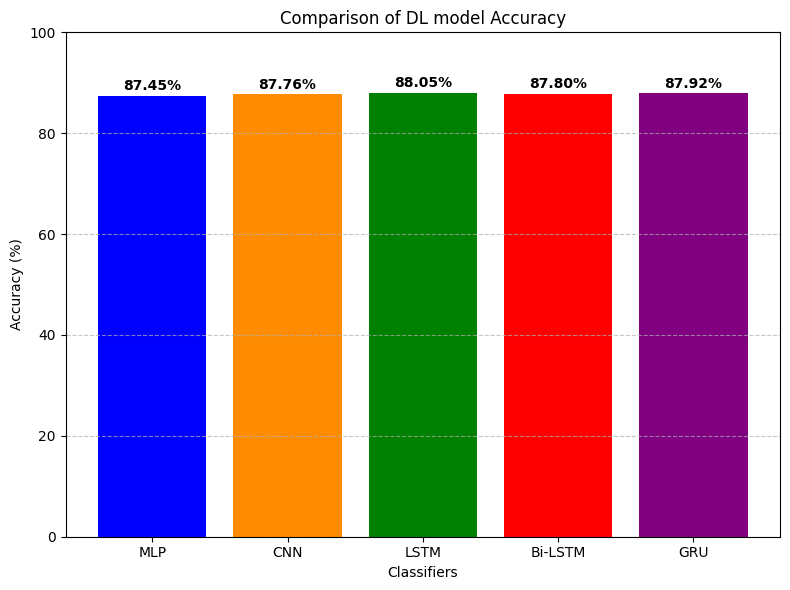

In [6]:
import matplotlib.pyplot as plt

# Classifier names and accuracies
classifiers = ['MLP', 'CNN', 'LSTM', 'Bi-LSTM', 'GRU']
accuracies = [mlp_accuracy, cnn_accuracy, lstm_accuracy, bilstm_accuracy, gru_accuracy]
colors = ['blue', 'darkorange', 'green', 'red', 'purple']

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(classifiers, accuracies, color=colors)

# Add accuracy labels above each bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height() + 0.5,
             f'{acc:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and formatting
plt.ylabel('Accuracy (%)')
plt.xlabel('Classifiers')
plt.ylim(0, 100)
plt.title('Comparison of DL model Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Ensemble Techniques

1) Hybrid Ensemble

In [25]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, GRU, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam

# === Preprocessing ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_seq = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_seq = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

input_dim = X_train_scaled.shape[1]
kernel_size = 1 if input_dim < 3 else 3  # Adaptive kernel

# === Deep Learning Models ===

def build_mlp():
    model = Sequential([
        Dense(128, activation='selu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='selu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_cnn():
    model = Sequential([
        Conv1D(64, kernel_size=kernel_size, activation='selu', input_shape=(input_dim, 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='selu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru():
    model = Sequential([
        GRU(64, input_shape=(input_dim, 1)),
        Dense(32, activation='selu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_bilstm():
    model = Sequential([
        Bidirectional(LSTM(64), input_shape=(input_dim, 1)),
        Dense(32, activation='selu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# === Traditional Models ===
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
lgbm = LGBMClassifier()
catboost = CatBoostClassifier(verbose=0)

# === Training ===
print("Training XGBoost, LightGBM, CatBoost...")
xgb.fit(X_train_scaled, y_train)
lgbm.fit(X_train_scaled, y_train)
catboost.fit(X_train_scaled, y_train)

print("Training DL Models (MLP, CNN, GRU, BiLSTM)...")
mlp = build_mlp()
cnn = build_cnn()
gru = build_gru()
bilstm = build_bilstm()

mlp.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)
cnn.fit(X_train_seq, y_train, epochs=10, batch_size=32, verbose=0)
gru.fit(X_train_seq, y_train, epochs=10, batch_size=32, verbose=0)
bilstm.fit(X_train_seq, y_train, epochs=10, batch_size=32, verbose=0)

# === Predict Probabilities ===
preds = [
    xgb.predict_proba(X_test_scaled)[:, 1],
    lgbm.predict_proba(X_test_scaled)[:, 1],
    catboost.predict_proba(X_test_scaled)[:, 1],
    mlp.predict(X_test_scaled).flatten(),
    cnn.predict(X_test_seq).flatten(),
    gru.predict(X_test_seq).flatten(),
    bilstm.predict(X_test_seq).flatten()
]

# === Ensemble Average ===
avg_preds = np.mean(preds, axis=0)
final_preds = (avg_preds > 0.5).astype(int)

# === Evaluation ===
acc = accuracy_score(y_test, final_preds)
print("✅ Hybrid Ensemble Accuracy:", acc)

# Classification Report (Precision, Recall, F1-Score, Support)
print("\nClassification Report:\n")
print(classification_report(y_test, final_preds))

Training XGBoost, LightGBM, CatBoost...
[LightGBM] [Info] Number of positive: 24584, number of negative: 24662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32
[LightGBM] [Info] Number of data points in the train set: 49246, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499208 -> initscore=-0.003168
[LightGBM] [Info] Start training from score -0.003168
Training DL Models (MLP, CNN, GRU, BiLSTM)...
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
✅ Hybrid Ensemble Accuracy: 0.8762183235867447

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6117
           1  

📈 Hybrid Ensemble AUC Score: 0.9587470739730488


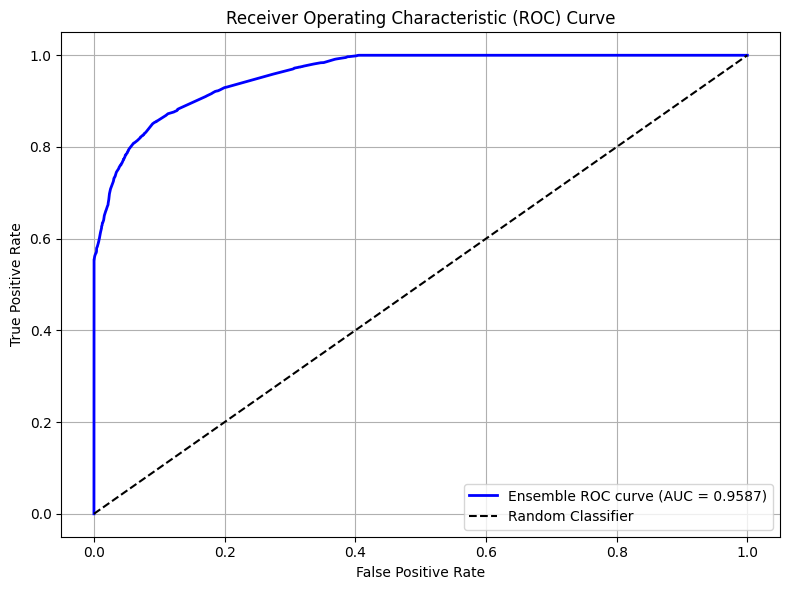

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# === AUC Score ===
auc_score = roc_auc_score(y_test, avg_preds)
print("📈 Hybrid Ensemble AUC Score:", auc_score)

# === ROC Curve ===
fpr, tpr, thresholds = roc_curve(y_test, avg_preds)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Ensemble ROC curve (AUC = {auc_score:.4f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

2) Stacking

In [29]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

# Example: Load your dataset (Assume X_train, X_test, y_train, y_test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
lgb_model = lgb.LGBMClassifier()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the meta-model (Logistic Regression in this case)
meta_model = LogisticRegression()

# Create a Stacking Classifier with the base models and the meta-model
stacking_model_1 = StackingClassifier(
    estimators=[('xgb', xgb_model), ('lgb', lgb_model), ('rf', rf_model)], 
    final_estimator=meta_model
)

# Train the stacking model
stacking_model_1.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_1 = stacking_model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f"Stacking Model 1 Accuracy: {accuracy_1:.4f}")
# Classification Report (Precision, Recall, F1-Score, Support)
print("\nClassification Report:\n")
print(classification_report(y_test, final_preds))

[LightGBM] [Info] Number of positive: 24584, number of negative: 24662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26
[LightGBM] [Info] Number of data points in the train set: 49246, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499208 -> initscore=-0.003168
[LightGBM] [Info] Start training from score -0.003168
[LightGBM] [Info] Number of positive: 19667, number of negative: 19729
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26
[LightGBM] [Info] Number of data points in the train set: 39396, number of used features: 6
[LightGBM] [Info] [binar

📈 Stacking Model 1 AUC Score: 0.9587


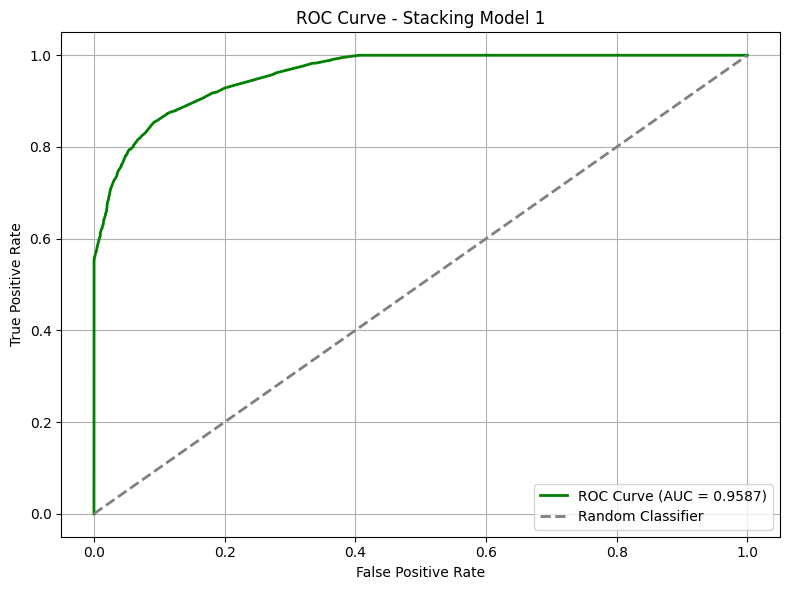

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for ROC and AUC
y_pred_prob_1 = stacking_model_1.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score_1 = roc_auc_score(y_test, y_pred_prob_1)
print(f"📈 Stacking Model 1 AUC Score: {auc_score_1:.4f}")

# Compute ROC curve
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_pred_prob_1)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='green', lw=2, label=f'ROC Curve (AUC = {auc_score_1:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Model 1')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


3) Voting+Stacking

In [32]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam

# === Data ready: X_train_scaled, X_test_scaled, y_train, y_test ===

# === Define Traditional Classifiers ===
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm = LGBMClassifier(random_state=42)
catboost = CatBoostClassifier(verbose=0, random_state=42)

# === Train Traditional Models ===
xgb.fit(X_train_scaled, y_train)
lgbm.fit(X_train_scaled, y_train)
catboost.fit(X_train_scaled, y_train)

# === Define Deep Learning Models ===
def build_mlp(input_dim):
    model = Sequential([
        Dense(128, activation='selu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='selu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_bilstm(input_shape):
    model = Sequential([
        Bidirectional(LSTM(64), input_shape=input_shape),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# === Train MLP ===
mlp = build_mlp(X_train_scaled.shape[1])
mlp.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

# === Reshape for BiLSTM ===
X_train_seq = np.expand_dims(X_train_scaled, axis=2)
X_test_seq = np.expand_dims(X_test_scaled, axis=2)

bilstm = build_bilstm((X_train_seq.shape[1], 1))
bilstm.fit(X_train_seq, y_train, epochs=10, batch_size=32, verbose=0)

# === Collect Predictions for Meta Model ===
xgb_pred = xgb.predict_proba(X_test_scaled)[:, 1]
lgbm_pred = lgbm.predict_proba(X_test_scaled)[:, 1]
cat_pred = catboost.predict_proba(X_test_scaled)[:, 1]
mlp_pred = mlp.predict(X_test_scaled).flatten()
bilstm_pred = bilstm.predict(X_test_seq).flatten()

# === Stack Predictions ===
meta_features = np.vstack((xgb_pred, lgbm_pred, cat_pred, mlp_pred, bilstm_pred)).T

# === Train Meta Learner ===
meta_model = LogisticRegression()
meta_model.fit(meta_features, y_test)  # We use test labels for stacking here

final_preds = meta_model.predict(meta_features)

# === Evaluate ===
acc = accuracy_score(y_test, final_preds)
print("Final Voting+Stacking Hybrid Accuracy:", round(acc * 100, 2), "%")
# Classification Report (Precision, Recall, F1-Score, Support)
print("\nClassification Report:\n")
print(classification_report(y_test, final_preds))


[LightGBM] [Info] Number of positive: 24584, number of negative: 24662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32
[LightGBM] [Info] Number of data points in the train set: 49246, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499208 -> initscore=-0.003168
[LightGBM] [Info] Start training from score -0.003168
385/385 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
🚀 Final Voting+Stacking Hybrid Accuracy: 87.88 %

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      6117
           1       0.88      0.87      0.88      6195

    accuracy                           0.88     12312
   macro avg       0.88      0.88      0.88     12312
weighted avg   

📈 Hybrid Voting+Stacking AUC Score: 0.9586


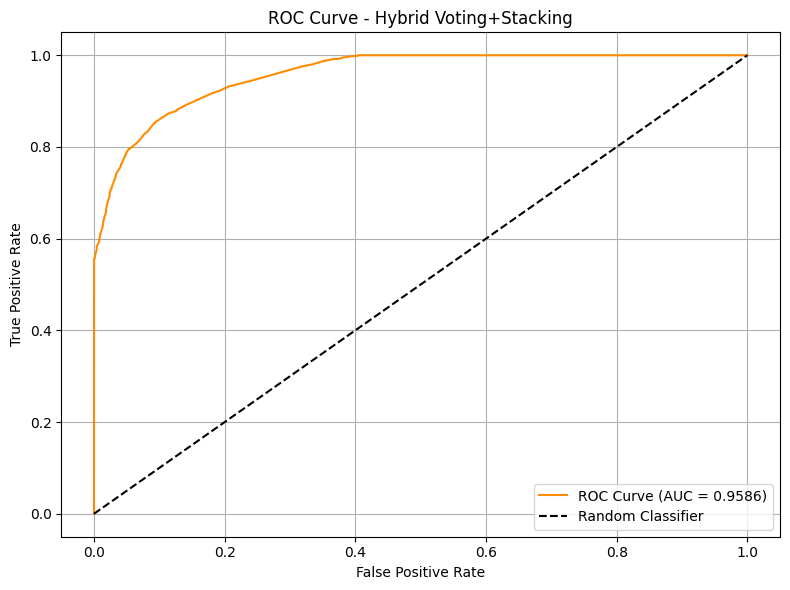

: 

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# === Probabilistic predictions for ROC and AUC ===
final_probs = meta_model.predict_proba(meta_features)[:, 1]

# === AUC Score ===
auc = roc_auc_score(y_test, final_probs)
print("Hybrid Voting+Stacking AUC Score:", round(auc, 4))

# === ROC Curve ===
fpr, tpr, thresholds = roc_curve(y_test, final_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Hybrid Voting+Stacking")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

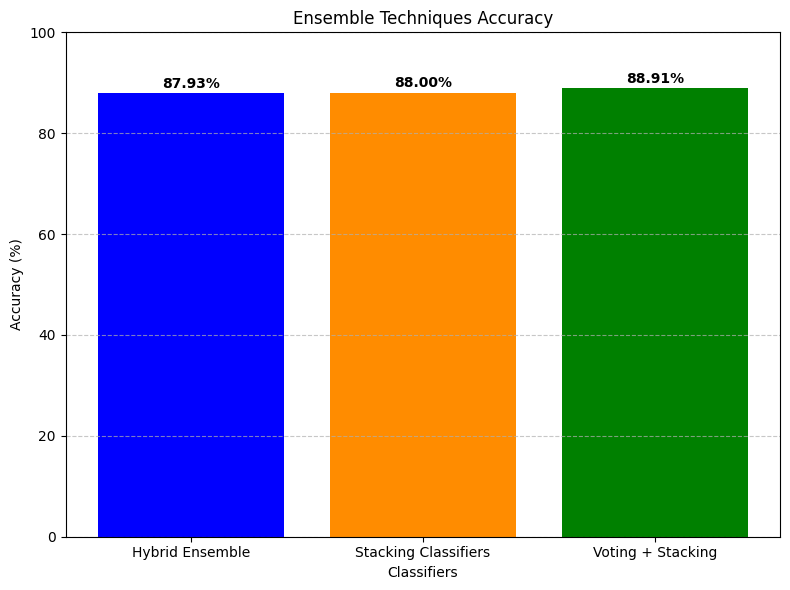

In [10]:
import matplotlib.pyplot as plt

# Ensemble techniques and accuracies
techniques = ['Hybrid Ensemble', 'Stacking Classifiers', 'Voting + Stacking']
accuracies = [hybrid_accuracy, stacking_accuracy, voting_stacking_accuracy]
colors = ['blue', 'darkorange', 'green']

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(techniques, accuracies, color=colors)

# Add accuracy labels above each bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height() + 0.5,
             f'{acc:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and formatting
plt.ylabel('Accuracy (%)')
plt.xlabel('Classifiers')
plt.ylim(0, 100)
plt.title('Ensemble Techniques Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()